In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [8]:
ms_posts_may = pd.read_csv('../data/raw/statuses_may2025_3k.csv')
ms_posts_may.head()

,id,uri,url,in_reply_to_id,in_reply_to_account_id,reblog,content,created_at,reblogs_count,favourites_count,...,poll.id,poll.expires_at,poll.expired,poll.multiple,poll.votes_count,poll.voted,poll.options,poll.emojis,poll.own_votes,poll.voters_count
0,114591077920032117,https://misskey.omhnc.net/notes/a8cwmd6zsg,https://misskey.omhnc.net/notes/a8cwmd6zsg,NaN,NaN,NaN,<p><span>これだった世界線もあったわけですねえ<br></span><a href=...,2025-05-29 12:18:05.003000+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,114591077914010188,https://mastodon.social/users/africa_social/st...,https://mastodon.social/@africa_social/1145910...,NaN,NaN,NaN,<p>📢 États-Unis : Elon Musk quitte l&#39;admin...,2025-05-29 12:18:06.337000+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114591077890372683,https://lasitua.org/federation/m/2904,https://lasitua.org/event/laboratorio-aperto-120,NaN,NaN,NaN,<p><strong>Laboratorio aperto</strong></p>\n\n...,2025-05-29 12:17:53.420000+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,114591077876883514,https://nijimiss.moe/notes/01JWDZMT0YRM9GWAGRZ...,https://nijimiss.moe/notes/01JWDZMT0YRM9GWAGRZ...,NaN,NaN,NaN,"<p>トマト！！！ <a href=""https://nijimiss.moe/tags/...",2025-05-29 12:18:04.958000+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,114591077873371263,https://channels.im/users/mlb/statuses/1145910...,https://channels.im/@mlb/114591077777753199,NaN,NaN,NaN,<p>Underrated Mets asset deemed ‘easy call’ to...,2025-05-29 12:18:04+00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
from pathlib import Path


In [11]:
keep_cols = [
    'id',
    'created_at',
    'account.id',
    'account.acct',
    'account.username',
    "account.followers_count",
    "account.following_count",
    "account.statuses_count",
    'reblogs_count',
    'favourites_count',
    'replies_count',      
    'tag_list'
]
ms_posts_may_clean = ms_posts_may[keep_cols].copy()   
out_path = '../data/processed/statuses_may2025_clean_3k.csv'
Path(out_path).parent.mkdir(parents=True, exist_ok=True)
ms_posts_may_clean.to_csv(out_path, index=False)

In [12]:
ms_posts_may_clean.head()

,id,created_at,account.id,account.acct,account.username,account.followers_count,account.following_count,account.statuses_count,reblogs_count,favourites_count,replies_count,tag_list
0,114591077920032117,2025-05-29 12:18:05.003000+00:00,1253858,onodai145@misskey.omhnc.net,onodai145,355,163,104446,0,0,0,[]
1,114591077914010188,2025-05-29 12:18:06.337000+00:00,114052052079627493,africa_social,africa_social,66,0,26867,0,0,0,[]
2,114591077890372683,2025-05-29 12:17:53.420000+00:00,110197257686391283,LaSitua@lasitua.org,LaSitua,6,0,970,0,0,0,[]
3,114591077876883514,2025-05-29 12:18:04.958000+00:00,112983011908976179,shogoth_nagashi@nijimiss.moe,shogoth_nagashi,156,109,61985,0,0,0,['好きなピザの具を言ってltlをピザパーティー会場にする']
4,114591077873371263,2025-05-29 12:18:04+00:00,114404588683413474,mlb@channels.im,mlb,14,0,30172,0,0,0,"['baseball', 'mets', 'mlb', 'newyork', 'newyor..."


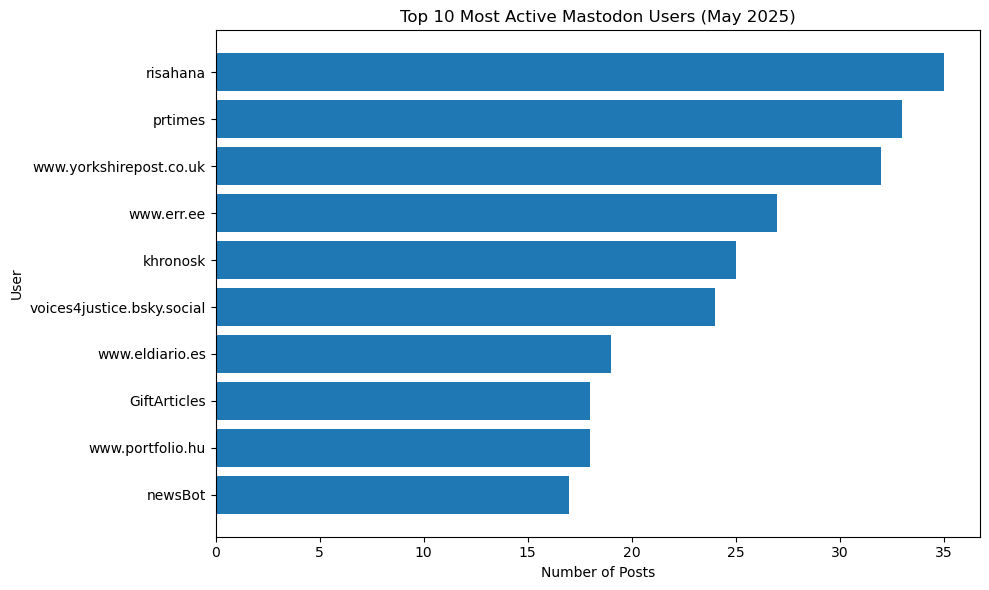

In [13]:
post_counts = (
    ms_posts_may_clean['account.username']
    .value_counts()
    .head(10)
    .sort_values()
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(post_counts.index, post_counts.values)
ax.set_xlabel('Number of Posts')
ax.set_ylabel('User')
ax.set_title('Top 10 Most Active Mastodon Users (May 2025)')
plt.tight_layout()
plt.show()

In [14]:
post_counts

account.username
newsBot                       17
www.portfolio.hu              18
GiftArticles                  18
www.eldiario.es               19
voices4justice.bsky.social    24
khronosk                      25
www.err.ee                    27
www.yorkshirepost.co.uk       32
prtimes                       33
risahana                      35
Name: count, dtype: int64

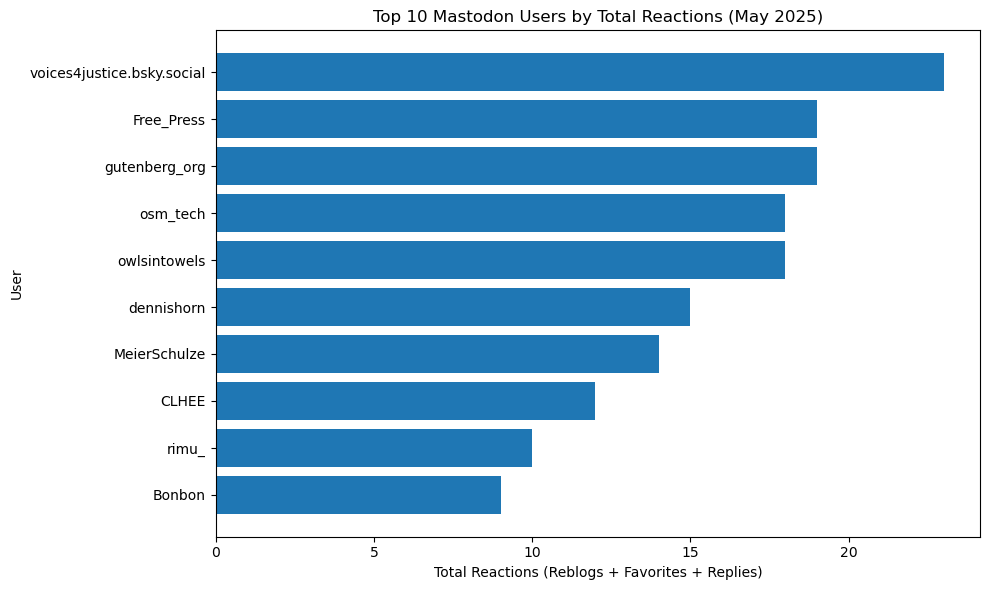

In [15]:
ms_posts_may_clean['total_reactions'] = (
    ms_posts_may_clean['reblogs_count'] +
    ms_posts_may_clean['favourites_count'] +
    ms_posts_may_clean['replies_count']
)

user_stats = (
    ms_posts_may_clean
    .groupby('account.username')
    .agg(
        total_reactions=('total_reactions', 'sum'),
        post_count=('id', 'count')
    )
    .reset_index()
)

top_by_reactions = (
    user_stats.nlargest(10, 'total_reactions')
    .set_index('account.username')
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    top_by_reactions.index[::-1],
    top_by_reactions['total_reactions'][::-1]
)
ax.set_xlabel('Total Reactions (Reblogs + Favorites + Replies)')
ax.set_ylabel('User')
ax.set_title('Top 10 Mastodon Users by Total Reactions (May 2025)')
plt.tight_layout()
plt.show()

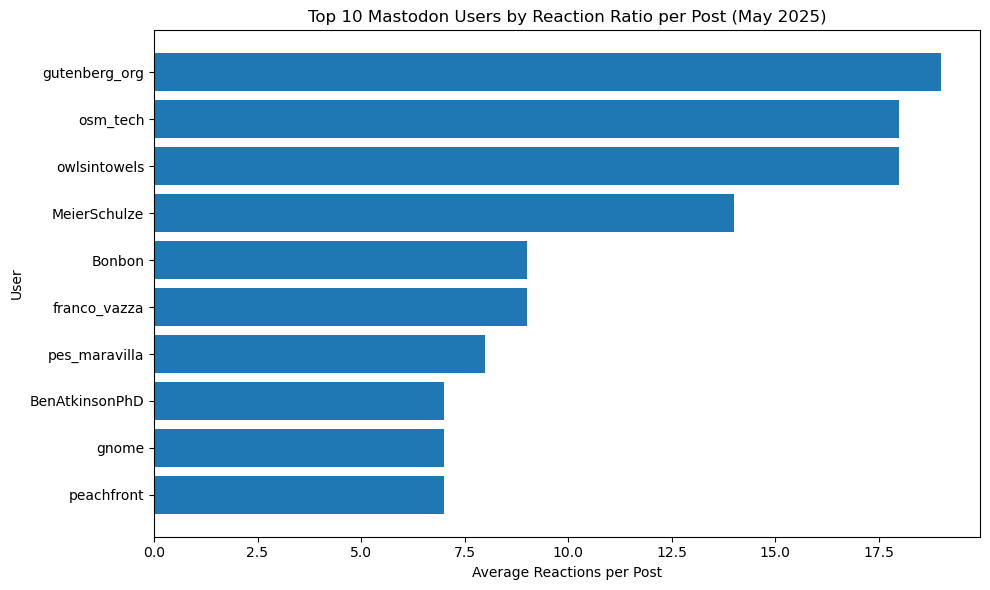

In [16]:
user_stats['reaction_ratio'] = (
    user_stats['total_reactions'] / user_stats['post_count']
)

top_by_ratio = (
    user_stats.nlargest(10, 'reaction_ratio')
    .set_index('account.username')
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(
    top_by_ratio.index[::-1],
    top_by_ratio['reaction_ratio'][::-1]
)
ax.set_xlabel('Average Reactions per Post')
ax.set_ylabel('User')
ax.set_title('Top 10 Mastodon Users by Reaction Ratio per Post (May 2025)')
plt.tight_layout()
plt.show()

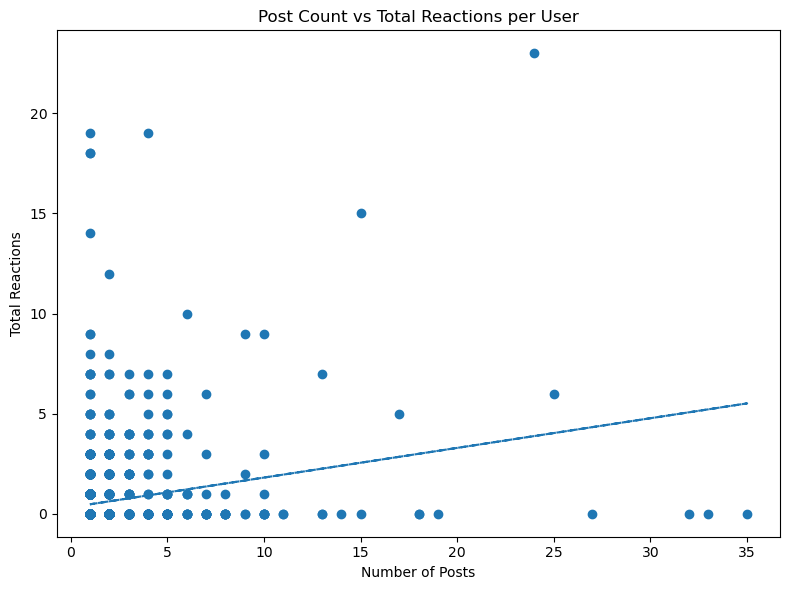

Spearman r (posts vs total reactions): 0.18, p=0.000


In [17]:
from scipy.stats import pearsonr, spearmanr

# Post count vs Total reactions
x1, y1 = user_stats['post_count'], user_stats['total_reactions']
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x1, y1)
m1, b1 = np.polyfit(x1, y1, 1)
ax.plot(x1, m1*x1 + b1, linestyle='--')
ax.set_xlabel('Number of Posts')
ax.set_ylabel('Total Reactions')
ax.set_title('Post Count vs Total Reactions per User')
plt.tight_layout()
plt.show()
r1, p1 = spearmanr(x1, y1)
print(f'Spearman r (posts vs total reactions): {r1:.2f}, p={p1:.3f}')

In [18]:
r1_pearson, p1_pearson = pearsonr(x1, y1)
print(f'Pearson r (posts vs total reactions): {r1_pearson:.2f}, p={p1_pearson:.3f}')

Pearson r (posts vs total reactions): 0.21, p=0.000


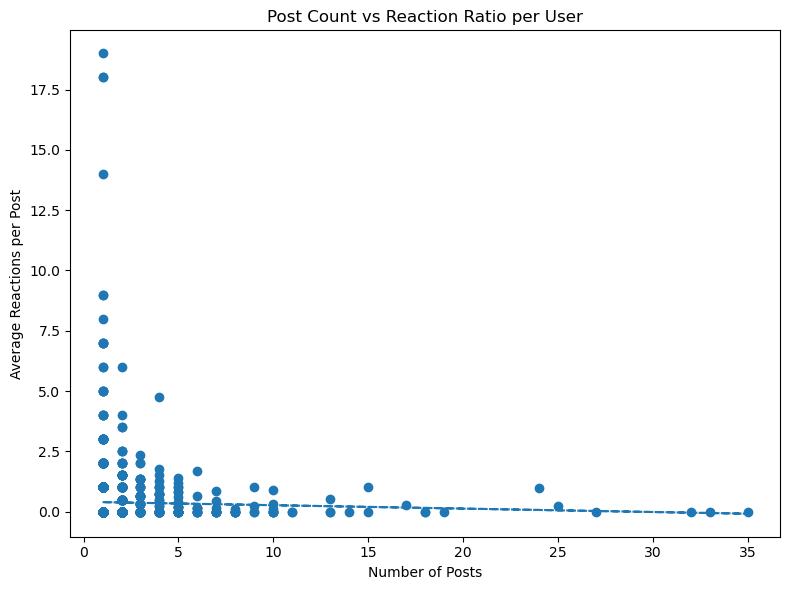

Spearman r (posts vs reaction ratio): 0.11, p=0.000


In [19]:
x2, y2 = user_stats['post_count'], user_stats['reaction_ratio']
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x2, y2)
m2, b2 = np.polyfit(x2, y2, 1)
ax.plot(x2, m2*x2 + b2, linestyle='--')
ax.set_xlabel('Number of Posts')
ax.set_ylabel('Average Reactions per Post')
ax.set_title('Post Count vs Reaction Ratio per User')
plt.tight_layout()
plt.show()
r2, p2 = spearmanr(x2, y2)
print(f'Spearman r (posts vs reaction ratio): {r2:.2f}, p={p2:.3f}')

In [20]:
ms_posts_may_clean.head(10)

,id,created_at,account.id,account.acct,account.username,account.followers_count,account.following_count,account.statuses_count,reblogs_count,favourites_count,replies_count,tag_list,total_reactions
0,114591077920032117,2025-05-29 12:18:05.003000+00:00,1253858,onodai145@misskey.omhnc.net,onodai145,355,163,104446,0,0,0,[],0
1,114591077914010188,2025-05-29 12:18:06.337000+00:00,114052052079627493,africa_social,africa_social,66,0,26867,0,0,0,[],0
2,114591077890372683,2025-05-29 12:17:53.420000+00:00,110197257686391283,LaSitua@lasitua.org,LaSitua,6,0,970,0,0,0,[],0
3,114591077876883514,2025-05-29 12:18:04.958000+00:00,112983011908976179,shogoth_nagashi@nijimiss.moe,shogoth_nagashi,156,109,61985,0,0,0,['好きなピザの具を言ってltlをピザパーティー会場にする'],0
4,114591077873371263,2025-05-29 12:18:04+00:00,114404588683413474,mlb@channels.im,mlb,14,0,30172,0,0,0,"['baseball', 'mets', 'mlb', 'newyork', 'newyor...",0
5,114591077860728770,2025-05-29 12:18:04.929000+00:00,110875569601952204,khronosk@soukun.io,khronosk,343,323,116059,0,0,0,[],0
6,114591077859969931,2025-05-29 12:18:01+00:00,111687508918072757,Ether14Radio@ffxiv-mastodon.com,Ether14Radio,12,31,609,0,0,0,['ether14radio'],0
7,114591077835074849,2025-05-29 12:18:05.134000+00:00,111716915115017433,AJ_andrew69,AJ_andrew69,177,235,1825,0,0,0,[],0
8,114591077807119736,2025-05-29 12:18:04.705000+00:00,108216893426091243,t93366987,t93366987,11,55,267,0,0,0,[],0
9,114591077795317557,2025-05-29 12:18:04+00:00,109298823558019461,Ink_Soul@writing.exchange,Ink_Soul,469,379,894,0,0,0,['scribesandmakers'],0


In [27]:
import ast

ms_posts_may_clean['tag_list'] = ms_posts_may_clean['tag_list'].apply(
    lambda cell: ast.literal_eval(cell) if isinstance(cell, str) else cell
)

df_tags = (
    ms_posts_may_clean
    .explode('tag_list')
    .loc[lambda d: d['tag_list'].notna() & (d['tag_list'] != '')]
    .loc[lambda d: d['tag_list'].apply(lambda tag: tag.isascii())]
)
df_tags.head(10)


,id,created_at,account.id,account.acct,account.username,account.followers_count,account.following_count,account.statuses_count,reblogs_count,favourites_count,replies_count,tag_list,total_reactions
4,114591077873371263,2025-05-29 12:18:04+00:00,114404588683413474,mlb@channels.im,mlb,14,0,30172,0,0,0,baseball,0
4,114591077873371263,2025-05-29 12:18:04+00:00,114404588683413474,mlb@channels.im,mlb,14,0,30172,0,0,0,mets,0
4,114591077873371263,2025-05-29 12:18:04+00:00,114404588683413474,mlb@channels.im,mlb,14,0,30172,0,0,0,mlb,0
4,114591077873371263,2025-05-29 12:18:04+00:00,114404588683413474,mlb@channels.im,mlb,14,0,30172,0,0,0,newyork,0
4,114591077873371263,2025-05-29 12:18:04+00:00,114404588683413474,mlb@channels.im,mlb,14,0,30172,0,0,0,newyorkmets,0
6,114591077859969931,2025-05-29 12:18:01+00:00,111687508918072757,Ether14Radio@ffxiv-mastodon.com,Ether14Radio,12,31,609,0,0,0,ether14radio,0
9,114591077795317557,2025-05-29 12:18:04+00:00,109298823558019461,Ink_Soul@writing.exchange,Ink_Soul,469,379,894,0,0,0,scribesandmakers,0
12,114591077738253098,2025-05-29 12:18:03+00:00,112428539465423256,bocvip@vive.im,bocvip,105,0,45282,0,0,0,stocks,0
16,114591077714474075,2025-05-29 12:18:01+00:00,111874928224359467,theguardian_climate_crisis@halo.nu,theguardian_climate_crisis,215,0,1593,0,0,0,trumpadministration,0
16,114591077714474075,2025-05-29 12:18:01+00:00,111874928224359467,theguardian_climate_crisis@halo.nu,theguardian_climate_crisis,215,0,1593,0,0,0,climatecrisis,0


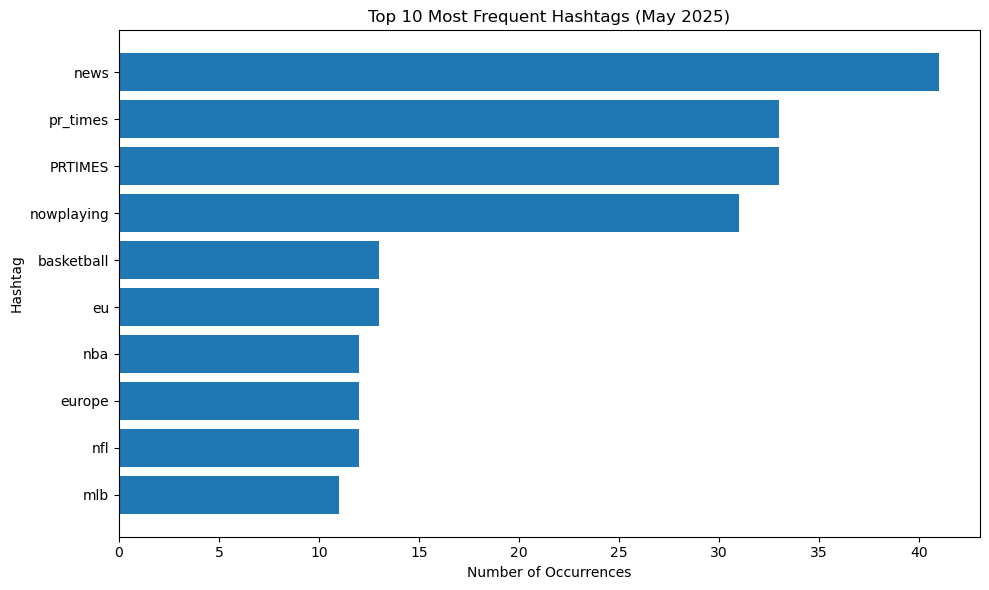

In [28]:
df_tags = df_tags[df_tags['tag_list'].notna() & (df_tags['tag_list'] != '')]

tag_counts = df_tags['tag_list'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(tag_counts.index[::-1], tag_counts.values[::-1])
ax.set_xlabel('Number of Occurrences')
ax.set_ylabel('Hashtag')
ax.set_title('Top 10 Most Frequent Hashtags (May 2025)')
plt.tight_layout()
plt.show()

In [29]:
import numpy as np
from scipy.stats import mannwhitneyu

In [30]:
ms_posts_may_clean['has_hashtag'] = ms_posts_may_clean['tag_list'].apply(lambda tags: len(tags) > 0)
ms_posts_may_clean.head(10)

,id,created_at,account.id,account.acct,account.username,account.followers_count,account.following_count,account.statuses_count,reblogs_count,favourites_count,replies_count,tag_list,total_reactions,has_hashtag
0,114591077920032117,2025-05-29 12:18:05.003000+00:00,1253858,onodai145@misskey.omhnc.net,onodai145,355,163,104446,0,0,0,[],0,False
1,114591077914010188,2025-05-29 12:18:06.337000+00:00,114052052079627493,africa_social,africa_social,66,0,26867,0,0,0,[],0,False
2,114591077890372683,2025-05-29 12:17:53.420000+00:00,110197257686391283,LaSitua@lasitua.org,LaSitua,6,0,970,0,0,0,[],0,False
3,114591077876883514,2025-05-29 12:18:04.958000+00:00,112983011908976179,shogoth_nagashi@nijimiss.moe,shogoth_nagashi,156,109,61985,0,0,0,[好きなピザの具を言ってltlをピザパーティー会場にする],0,True
4,114591077873371263,2025-05-29 12:18:04+00:00,114404588683413474,mlb@channels.im,mlb,14,0,30172,0,0,0,"[baseball, mets, mlb, newyork, newyorkmets]",0,True
5,114591077860728770,2025-05-29 12:18:04.929000+00:00,110875569601952204,khronosk@soukun.io,khronosk,343,323,116059,0,0,0,[],0,False
6,114591077859969931,2025-05-29 12:18:01+00:00,111687508918072757,Ether14Radio@ffxiv-mastodon.com,Ether14Radio,12,31,609,0,0,0,[ether14radio],0,True
7,114591077835074849,2025-05-29 12:18:05.134000+00:00,111716915115017433,AJ_andrew69,AJ_andrew69,177,235,1825,0,0,0,[],0,False
8,114591077807119736,2025-05-29 12:18:04.705000+00:00,108216893426091243,t93366987,t93366987,11,55,267,0,0,0,[],0,False
9,114591077795317557,2025-05-29 12:18:04+00:00,109298823558019461,Ink_Soul@writing.exchange,Ink_Soul,469,379,894,0,0,0,[scribesandmakers],0,True


In [35]:
no_hashtag = ms_posts_may_clean[ms_posts_may_clean['has_hashtag']==False]['total_reactions']
yes_hashtag = ms_posts_may_clean[ms_posts_may_clean['has_hashtag']==True]['total_reactions']
print(no_hashtag.mean())
print(yes_hashtag.mean())
u_stat, p_value = mannwhitneyu(yes_hashtag, no_hashtag)
print(f'Mann-Whitney U statistic: {u_stat}, p-value: {p_value:.3f}')

0.24229885057471265
0.5890909090909091
Mann-Whitney U statistic: 1040776.0, p-value: 0.000


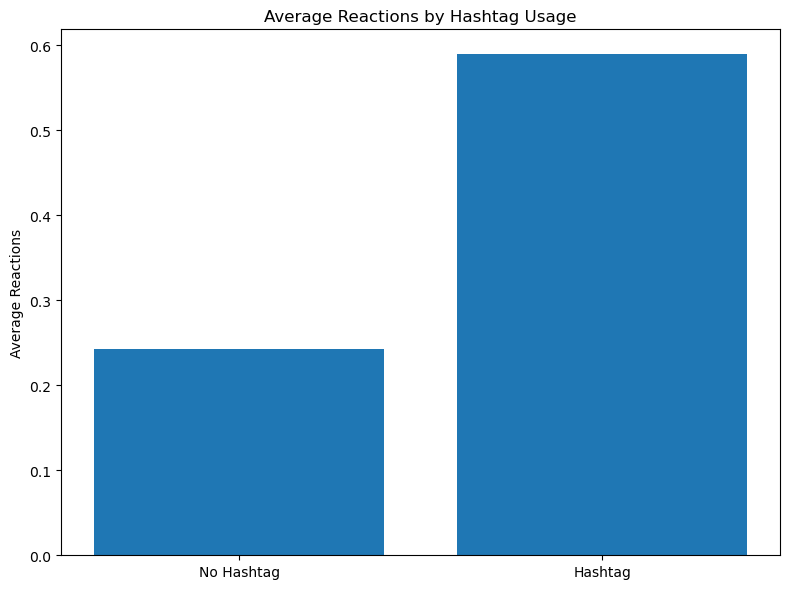

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar([0, 1], [no_hashtag.mean(), yes_hashtag.mean()], tick_label=['No Hashtag','Hashtag'])
ax.set_ylabel('Average Reactions')
ax.set_title('Average Reactions by Hashtag Usage')
plt.tight_layout()
plt.show()

In [36]:
U, p = mannwhitneyu(yes_hashtag, no_hashtag)
print(f"Mann-Whitney U = {U:.1f}, p-value = {p:.3f}")


Mann-Whitney U = 1040776.0, p-value = 0.000


In [37]:
tag_counts = df_tags['tag_list'].value_counts()
popular_tags = tag_counts.index[:10].tolist()
popular_tags

['news',
 'pr_times',
 'PRTIMES',
 'nowplaying',
 'basketball',
 'eu',
 'nba',
 'europe',
 'nfl',
 'mlb']

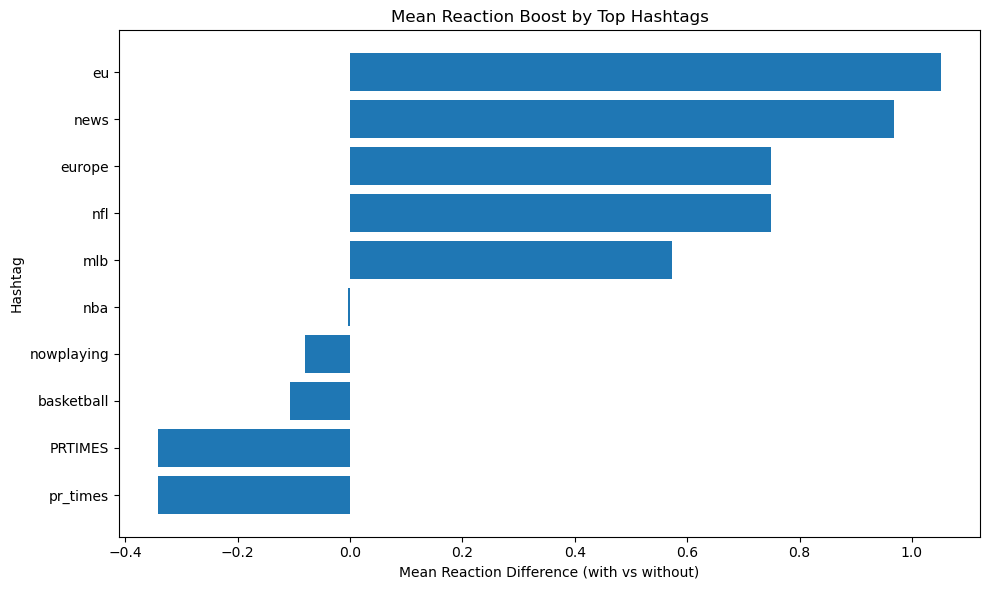

,n_posts,mean_with,mean_without,mean_diff,p_value
hashtag,,,,,
pr_times,33,0.000000,0.341422,-0.341422,2.694160e-03
PRTIMES,33,0.000000,0.341422,-0.341422,2.694160e-03
basketball,13,0.230769,0.338132,-0.107363,9.648932e-01
nowplaying,31,0.258065,0.338498,-0.080433,8.093584e-01
nba,12,0.333333,0.337684,-0.004351,3.883811e-01
mlb,11,0.909091,0.335564,0.573527,1.661191e-07
nfl,12,1.083333,0.334672,0.748661,2.440277e-10
europe,12,1.083333,0.334672,0.748661,1.362596e-07
news,41,1.292683,0.324434,0.968249,1.846907e-14


In [40]:
results = []
for tag in popular_tags:
    has_t = ms_posts_may_clean[ms_posts_may_clean['tag_list'].apply(lambda tags: tag in tags)]['total_reactions']
    no_t  = ms_posts_may_clean[~ms_posts_may_clean['tag_list'].apply(lambda tags: tag in tags)]['total_reactions']
    mean_with = has_t.mean()
    mean_without = no_t.mean()
    diff = mean_with - mean_without
    U_t, p_t = mannwhitneyu(has_t, no_t)
    results.append({
        'hashtag': tag,
        'n_posts': len(has_t),
        'mean_with': mean_with,
        'mean_without': mean_without,
        'mean_diff': diff,
        'p_value': p_t
    })

res_df = pd.DataFrame(results).set_index('hashtag').sort_values('mean_diff')

# Bar chart: mean_diff for each tag
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(res_df.index, res_df['mean_diff'])
ax.set_xlabel('Mean Reaction Difference (with vs without)')
ax.set_ylabel('Hashtag')
ax.set_title('Mean Reaction Boost by Top Hashtags')
plt.tight_layout()
plt.show()

# Display the summary table
res_df

In [41]:
follower_stats = (
    ms_posts_may_clean
    .sort_values('created_at')            # ensure chronological order
    .groupby('account.id', as_index=False)  # one row per user
    .last()[['account.username', 'account.statuses_count', 'account.followers_count']]
    .rename(columns={
        'account.username': 'username',
        'account.statuses_count': 'total_statuses',
        'account.followers_count': 'followers'
    })
)

follower_stats.head()

,username,total_statuses,followers
0,si2mev,2643,360
1,nivrig,11290,930
2,gnomon,45821,965
3,hrbrmstr,11331,2481
4,dougfort,1801,260


In [42]:
pearson_r, pearson_p = pearsonr(follower_stats['total_statuses'], follower_stats['followers'])
spearman_r, spearman_p = spearmanr(follower_stats['total_statuses'], follower_stats['followers'])

print(f'Pearson r  (statuses vs. followers): {pearson_r:.2f} (p = {pearson_p:.3f})')
print(f'Spearman r (statuses vs. followers): {spearman_r:.2f} (p = {spearman_p:.3f})')

Pearson r  (statuses vs. followers): 0.01 (p = 0.764)
Spearman r (statuses vs. followers): 0.53 (p = 0.000)


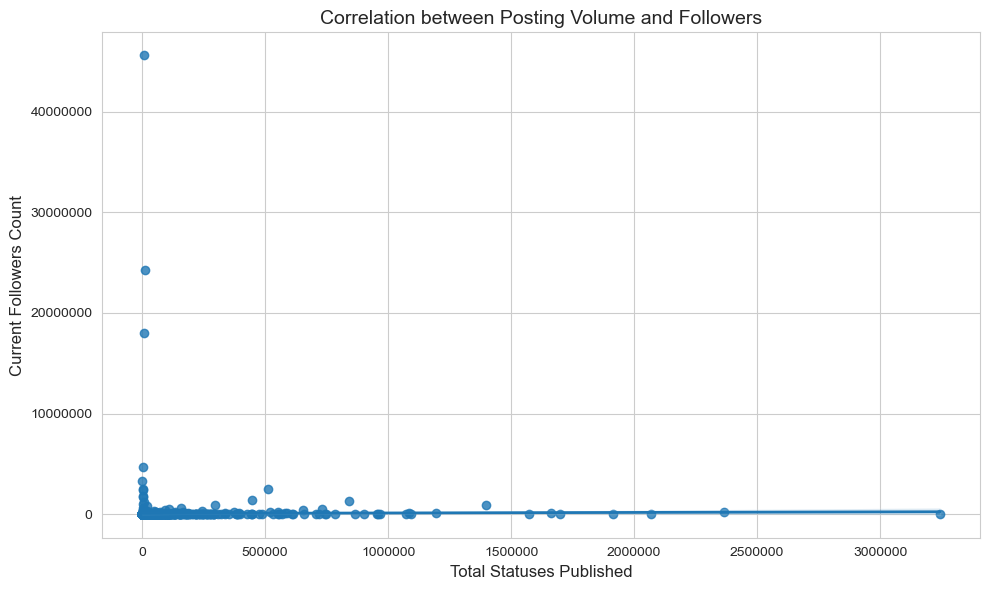

In [43]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(
    data=follower_stats,
    x='total_statuses',
    y='followers',
    scatter_kws={'alpha': 0.8},
    line_kws={'lw': 2}
)

# Axes & title styling
ax.set_xlabel('Total Statuses Published', fontsize=12)
ax.set_ylabel('Current Followers Count', fontsize=12)
ax.set_title('Correlation between Posting Volume and Followers', fontsize=14)
ax.ticklabel_format(style='plain')       
plt.tight_layout()
plt.show()

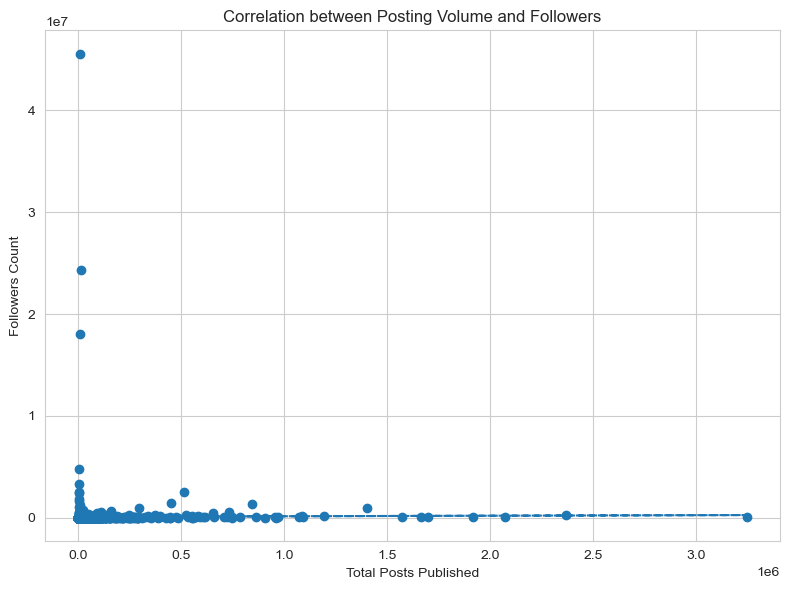

Spearman r (posts vs followers): 0.53, p=0.000


In [45]:
# Post count vs Total reactions
x1, y1 = follower_stats['total_statuses'], follower_stats['followers']
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x1, y1)
m1, b1 = np.polyfit(x1, y1, 1)
ax.plot(x1, m1*x1 + b1, linestyle='--')
ax.set_xlabel('Total Posts Published')
ax.set_ylabel('Followers Count')
ax.set_title('Correlation between Posting Volume and Followers')
plt.tight_layout()
plt.show()
r1, p1 = spearmanr(x1, y1)
print(f'Spearman r (posts vs followers): {r1:.2f}, p={p1:.3f}')